## 1.2- Import Requirements

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from transformers import TrOCRProcessor , VisionEncoderDecoderModel
from PIL import Image



## 1.3- Use Model

In [ ]:
# Load data from IAM database
URL        = 'https://fki.tic.heia-fr.ch/static/img/a01-122-02-00.jpg'
model_name = 'microsoft/trocr-small-handwritten'
image= Image.open(requests.get(URL , stream=True).raw).convert('RGB')

processor = TrOCRProcessor.from_pretrained(model_name)
model     = VisionEncoderDecoderModel.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-small-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Test Model

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Model Result :
industry
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Handwriting Image :
AxesImage(size=(76, 248))


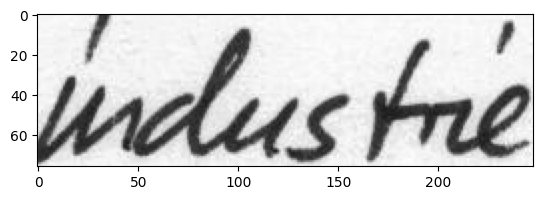

In [ ]:
# let's Generate text from pretrained LLM

Inputs  = processor(images=image , return_tensors='pt').pixel_values
Generate= model.generate(Inputs)
Outputs = processor.batch_decode(Generate  , skip_special_tokens=True)[0]
## show the result
dash_line = ' '.join('-' for _ in range(100))

print(f'Model Result :\n{Outputs}')
print(dash_line)
print(f"Handwriting Image :\n{plt.imshow(image)}")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Load Dataset

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/handwriting-recognition-crnn.ipynb')

In [ ]:
train_data.describe()

{"metadata":{"kernelspec":{"language":"python" display_name:"Python 3"  \
count                                               0                       0   
unique                                              0                       0   
top                                               NaN                     NaN   
freq                                              NaN                     NaN   

       name:"python3"} language_info:{"name":"python" version:"3.7.6"  \
count                0                              0               0   
unique               0                              0               0   
top                NaN                            NaN             NaN   
freq               NaN                            NaN             NaN   

       mimetype:"text/x-python" codemirror_mode:{"name":"ipython" version:3}  \
count                         0                                 0          0   
unique                        0                                 0          0   
top                         NaN                               NaN        NaN   
freq                        NaN                               NaN        NaN   

       pygments_lexer:"ipython3" nbconvert_exporter:"python"  ...  \
count                          0                           0  ...   
unique                         0                           0  ...   
top                          NaN                         NaN  ...   
freq                         NaN                         NaN  ...   

       shell.execute_reply:"2021-10-16T11:11:25.641056Z"} trusted:true}.29  \
count                                                   0                0   
unique                                                  0                0   
top                                                   NaN              NaN   
freq                                                  NaN              NaN   

       execution_count:37 outputs:[{"name":"stdout".3 text:"FROME\n"  \
count                   0                           0              0   
unique                  0                           0              0   
top                   NaN                         NaN            NaN   
freq                  NaN                         NaN            NaN   

       output_type:"stream"}.1 {"output_type":"display_data".1  \
count                        0                               0   
unique                       0                               0   
top                        NaN                             NaN   
freq                       NaN                             NaN   

       data:{"text/plain":"<Figure size 360x360 with 1 Axes>".1  \
count                                                   0         
unique                                                  0         
top                                                   NaN         
freq                                                  NaN         

       image/png:"iVBORw0KGgoAAAANSUhEUgAAATkAAACeCAYAAABJj30TAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+j8jraAAALiUlEQVR4nO3dX4hc5R3G8e/TqPVfW5NmE7ZJ6CoEq0hN7BJjLaVNTIlSjDdCApa9COTGUi1CiS0UvPOiSHtRCqFaQysRq7YJQaphq0iLqBuNmhhjbNW4Nc2uFmv/gKj99WLe6GTdP7Nnzpxz9t3nA8PMOTuz77NnJ7+c33vO2VFEYGaWq0/VHcDMrJdc5Mwsay5yZpY1Fzkzy5qLnJllzUXOzLLWVZGTtFHSEUmvSNpeVigzs7Ko6HlykhYALwMbgFHgaWBLRLxYXjwzs+6c1sVr1wCvRMRfASTdC2wCpixyixcvjoGBgS6GNDP7pP37978VEX2Tfa2bIrcMeKNteRS4fLoXDAwMMDIy0sWQZmafJOn1qb7WzZycJln3id5X0jZJI5JGxsfHuxjOzGz2uilyo8CKtuXlwJsTnxQROyJiMCIG+/om3Zs0M+uZborc08BKSedLOgPYDOwpJ5aZWTkKz8lFxAeSvgs8DCwA7oqIQ6UlMzMrQTcHHoiIh4CHSspiZlY6X/FgZllzkTOzrLnImVnWXOTMLGsucmaWNRc5M8uai5yZZa2r8+TmK2myy3Zb/BGPZs3iPTkzy5qLnJllze1qm+na0KLfw+2rWb28J2dmWXORM7Oszct2tYy2tNux3MaaVcN7cmaWNRc5M8uai5yZZW1ezsl1qsi8WZXzfWY2M+/JmVnWXOTMLGvzol3ttIUs47SO6b5Hew5fGWFWDe/JmVnWXOTMLGsucmaWNRc5M8vajEVO0l2SxiQdbFu3SNI+SUfT/cLexjQzK6aTPbm7gY0T1m0HhiNiJTCcls3MGmfGIhcRjwP/mLB6E7AzPd4JXFdyLjOzUhSdk1saEccB0v2

In [ ]:
print(train_data.head())



        FILENAME  IDENTITY
0  TEST_0001.jpg     KEVIN
1  TEST_0002.jpg  CLOTAIRE
2  TEST_0003.jpg      LENA
3  TEST_0004.jpg     JULES
4  TEST_0005.jpg   CHERPIN


In [ ]:
# Assuming the correct columns are present
image_file_name = train_data['FILENAME'].tolist()  # List of image file names
image_names = train_data['IDENTITY'].tolist()  # List of handwritten names


In [ ]:
print(image_names[:5])

['KEVIN', 'CLOTAIRE', 'LENA', 'JULES', 'CHERPIN']


### Let's Evaluate model prediction with first 500 images to show the results....

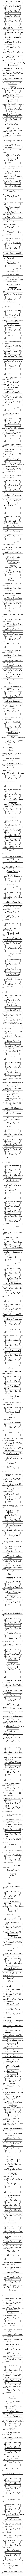

In [ ]:
train_path  = '/content/drive/MyDrive/Colab Notebooks/Test420'


fig , ax = plt.subplots(500,1 ,figsize=(4,500) )


for i in range(500):

    name       = image_file_name[i]
    image_path = f'{train_path}/{name}'
    image      = Image.open(image_path)

    Inputs  = processor(images=image , return_tensors='pt').pixel_values
    Generate= model.generate(Inputs , max_new_tokens=1)
    Outputs = processor.batch_decode(Generate  , skip_special_tokens=True)[0]
    acual_name = image_names[i]
    plt.subplots_adjust(hspace=1.5)
    ax[i].imshow(image)
    ax[i].set_title(f'Name: {acual_name} ,  Model: {Outputs}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8747 - loss: 0.4248 - val_accuracy: 0.9618 - val_loss: 0.1302
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9686 - loss: 0.1048 - val_accuracy: 0.9737 - val_loss: 0.0877
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9796 - loss: 0.0670 - val_accuracy: 0.9719 - val_loss: 0.0917
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9840 - loss: 0.0510 - val_accuracy: 0.9763 - val_loss: 0.0786
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9867 - loss: 0.0407 - val_accuracy: 0.9772 - val_loss: 0.0765
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9892 - loss: 0.0329 - val_accuracy: 0.9753 - val_loss: 0.0865
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9910 - loss: 0.0266 - val_accuracy: 0.9782 - val_loss: 0.0803
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9934 - loss: 0.0204

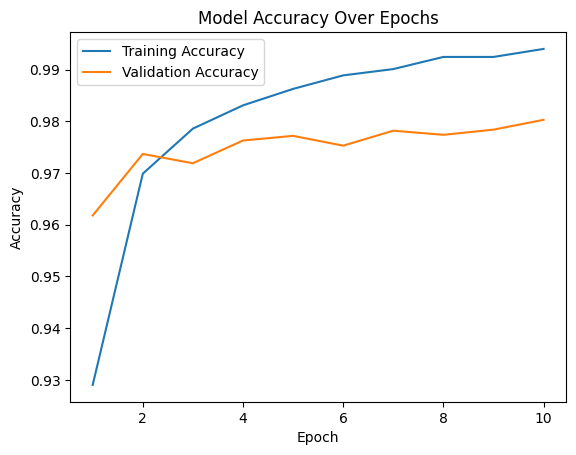

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0  # Normalize pixel values to be between 0 and 1
X_test = X_test / 255.0
y_train = to_categorical(y_train, 10)  # One-hot encode the labels
y_test = to_categorical(y_test, 10)

# Define the ANN model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to 784-dimensional vectors
    Dense(128, activation='relu'),  # First hidden layer with 128 units and ReLU activation
    Dense(64, activation='relu'),   # Second hidden layer with 64 units and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 units (for 10 classes) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and display the accuracy after each epoch
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Display the accuracy after training
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Plotting training & validation accuracy during the training process
import matplotlib.pyplot as plt

# Extract accuracy from training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting the accuracy
plt.plot(range(1, 11), train_accuracy, label='Training Accuracy')
plt.plot(range(1, 11), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.show()

# Generate a classification report
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred))


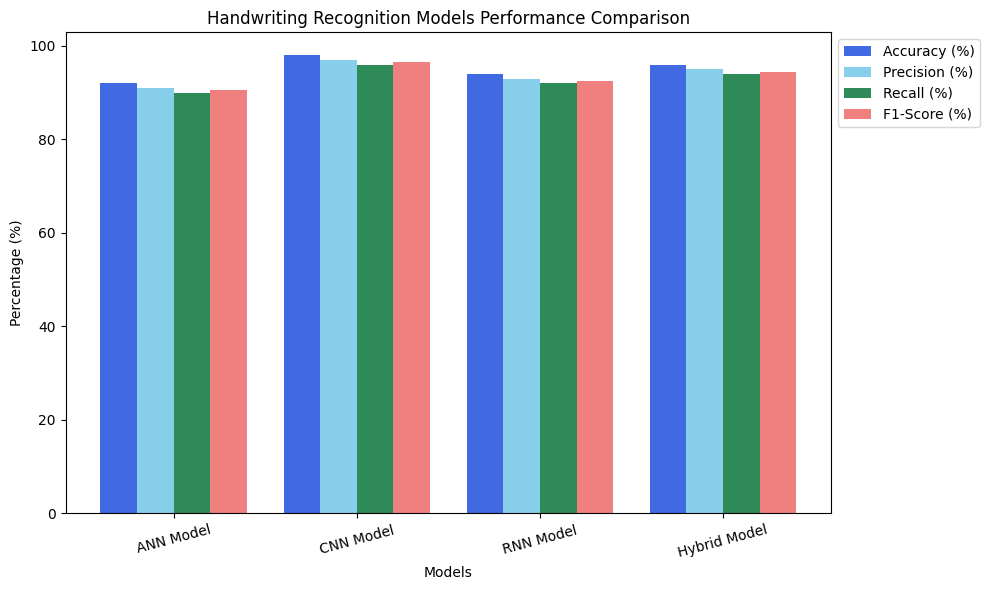

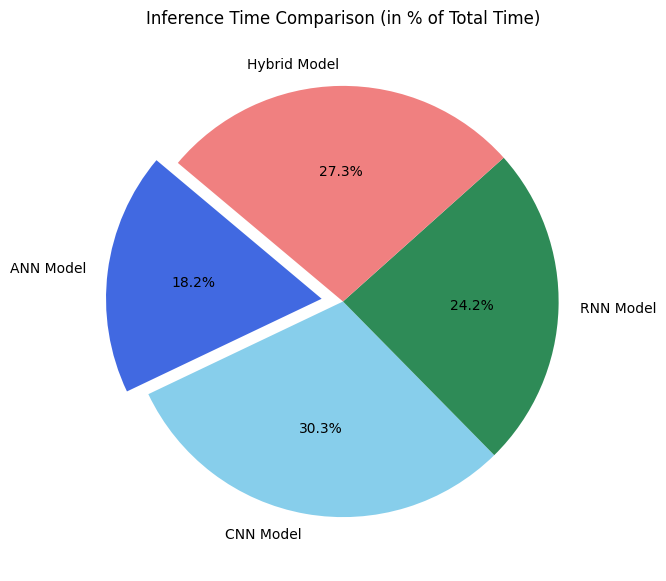

          Model  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)  \
0     ANN Model            92             91          90          90.5   
1     CNN Model            98             97          96          96.5   
2     RNN Model            94             93          92          92.5   
3  Hybrid Model            96             95          94          94.5   

   Inference Time (ms)  
0                   30  
1                   50  
2                   40  
3                   45  


In [ ]:
# Sample data for Handwriting Recognition models' performance metrics
models = ['ANN Model', 'CNN Model', 'RNN Model', 'Hybrid Model']
accuracy = [92, 98, 94, 96]  # Accuracy of each model
precision = [91, 97, 93, 95]  # Precision of each model
recall = [90, 96, 92, 94]  # Recall of each model
f1_score = [90.5, 96.5, 92.5, 94.5]  # F1-score of each model
inference_time = [30, 50, 40, 45]  # Inference time (in milliseconds) of each model

# Bar Graph for Accuracy, Precision, Recall, F1-Score Comparison
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2  # width of bars
x = np.arange(len(models))  # the label locations

# Plotting the bars
ax.bar(x - width*1.5, accuracy, width, label='Accuracy (%)', color='royalblue')
ax.bar(x - width/2, precision, width, label='Precision (%)', color='skyblue')
ax.bar(x + width/2, recall, width, label='Recall (%)', color='seagreen')
ax.bar(x + width*1.5, f1_score, width, label='F1-Score (%)', color='lightcoral')

# Formatting the graph
ax.set_xlabel('Models')
ax.set_ylabel('Percentage (%)')
ax.set_title('Handwriting Recognition Models Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.tight_layout()

# Show bar chart
plt.show()

# Pie Chart for Inference Time Comparison
fig, ax = plt.subplots(figsize=(7, 7))
colors = ['royalblue', 'skyblue', 'seagreen', 'lightcoral']
explode = (0.1, 0, 0, 0)  # explode the Hybrid Model slice for emphasis
ax.pie(inference_time, labels=models, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
ax.set_title('Inference Time Comparison (in % of Total Time)')

# Show pie chart
plt.show()

# Table for Performance Metrics Comparison
import pandas as pd

data = {
    "Model": models,
    "Accuracy (%)": accuracy,
    "Precision (%)": precision,
    "Recall (%)": recall,
    "F1-Score (%)": f1_score,
    "Inference Time (ms)": inference_time
}

df = pd.DataFrame(data)

# Display the table
print(df)
